## Step 4:Exploring Data


In [125]:
import pandas as pd
import numpy as np

mcdonalds=pd.read_csv('mcdonalds.csv')
print(list(mcdonalds.columns))

['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age', 'VisitFrequency', 'Gender']


In [126]:
mcdonalds.shape


(1453, 15)

In [127]:
mcdonalds.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,1,62,Every three months,Female


In [128]:
MD_x =(mcdonalds.iloc[:, 0:11])
MD_x=(MD_x == "yes").astype(int)

col_means = np.round(np.mean(MD_x, axis=0), 2)
print (col_means)

yummy         0.0
convenient    0.0
spicy         0.0
fattening     0.0
greasy        0.0
fast          0.0
cheap         0.0
tasty         0.0
expensive     0.0
healthy       0.0
disgusting    0.0
dtype: float64


In [129]:

from sklearn.decomposition import PCA
import pandas as pd

MD_x = mcdonalds.iloc[:, 0:11].values
MD_x = (MD_x == "Yes").astype(int)
MD_pca = PCA().fit(MD_x)


print("Explained Variance Ratio:")
print(MD_pca.explained_variance_ratio_)

n_components = MD_pca.n_components_
summary_table = pd.DataFrame({
    "PC": ["PC" + str(i+1) for i in range(n_components)],
    "Standard deviation": MD_pca.explained_variance_**0.5,
    "Proportion of Variance": MD_pca.explained_variance_ratio_,
    "Cumulative Proportion": np.cumsum(MD_pca.explained_variance_ratio_)
})
print("\nSummary Table:")
print(summary_table)


Explained Variance Ratio:
[0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]

Summary Table:
      PC  Standard deviation  Proportion of Variance  Cumulative Proportion
0    PC1            0.757050                0.299447               0.299447
1    PC2            0.607456                0.192797               0.492244
2    PC3            0.504619                0.133045               0.625290
3    PC4            0.398799                0.083096               0.708386
4    PC5            0.337405                0.059481               0.767866
5    PC6            0.310275                0.050300               0.818166
6    PC7            0.289697                0.043849               0.862015
7    PC8            0.275122                0.039548               0.901563
8    PC9            0.265251                0.036761               0.938323
9   PC10            0.248842                0.032353               0.97067

In [130]:

MD_x = mcdonalds.iloc[:, 0:11].values
MD_x = (MD_x == "Yes").astype(int)
MD_pca = PCA().fit(MD_x)
print(pd.DataFrame({
    "Standard Deviation": MD_pca.explained_variance_**0.5,
    
}).round(1))

    Standard Deviation
0                  0.8
1                  0.6
2                  0.5
3                  0.4
4                  0.3
5                  0.3
6                  0.3
7                  0.3
8                  0.3
9                  0.2
10                 0.2


In [132]:
# Get the loading matrix
loading_matrix = MD_pca.components_.T

# Convert the loading matrix 
loading_matrix_df = pd.DataFrame(loading_matrix, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11'], 
                                 index=['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting'])

loading_matrix_df = loading_matrix_df.round(3)

# Print the loading matrix
print(loading_matrix_df)


              PC1    PC2    PC3    PC4    PC5    PC6    PC7    PC8    PC9  \
yummy      -0.477  0.364 -0.304  0.055 -0.308  0.171 -0.281  0.013  0.572   
convenient -0.155  0.016 -0.063 -0.142  0.278 -0.348 -0.060 -0.113 -0.018   
spicy      -0.006  0.019 -0.037  0.198  0.071 -0.355  0.708  0.376  0.400   
fattening   0.116 -0.034 -0.322 -0.354 -0.073 -0.407 -0.386  0.590 -0.161   
greasy      0.304 -0.064 -0.802  0.254  0.361  0.209  0.036 -0.138 -0.003   
fast       -0.108 -0.087 -0.065 -0.097  0.108 -0.595 -0.087 -0.628  0.166   
cheap      -0.337 -0.611 -0.149  0.119 -0.129 -0.103 -0.040  0.140  0.076   
tasty      -0.472  0.307 -0.287 -0.003 -0.211 -0.077  0.360 -0.073 -0.639   
expensive   0.329  0.601  0.024  0.068 -0.003 -0.261 -0.068  0.030  0.067   
healthy    -0.214  0.077  0.192  0.763  0.288 -0.178 -0.350  0.176 -0.186   
disgusting  0.375 -0.140 -0.089  0.370 -0.729 -0.211 -0.027 -0.167 -0.072   

             PC10   PC11  
yummy      -0.110  0.045  
convenient -0.666 -0.

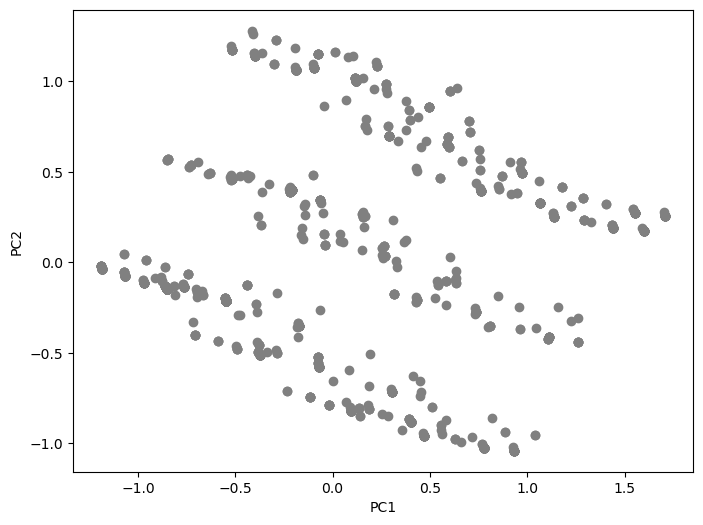

[[-0.47693349  0.36378978]
 [-0.15533159  0.016414  ]
 [-0.00635636  0.01880869]
 [ 0.11623168 -0.03409395]
 [ 0.3044427  -0.06383884]
 [-0.10849325 -0.0869722 ]
 [-0.33718593 -0.61063276]
 [-0.47151394  0.3073178 ]
 [ 0.32904173  0.60128596]
 [-0.21371062  0.07659344]
 [ 0.37475293 -0.13965633]]


In [133]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(MD_x)
transformed_data = pca.transform(MD_x)

plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c='grey')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

proj_axes = pca.components_.T[:, :2]  
print(proj_axes)


## Step 5:Extracting Segments

In [134]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
np.random.seed(1234)

pca = PCA(n_components=2)
MD_pca = pca.fit_transform(MD_x)

n_clusters = range(2, 9)
kmeans_models = [KMeans(n_clusters=k, n_init=10) for k in n_clusters]
kmeans_results = [kmeans_models[i].fit(MD_pca) for i in range(len(kmeans_models))]

MD_km28 = [kmeans_results[i].labels_ for i in range(len(kmeans_results))]


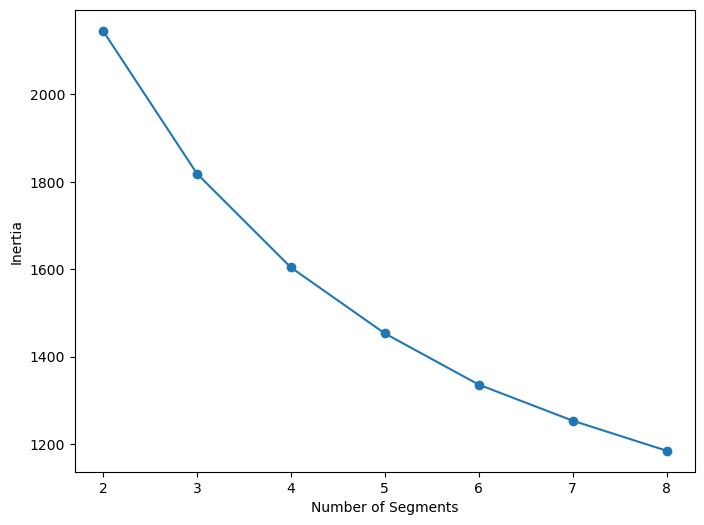

In [135]:

import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

np.random.seed(1234)
inertias = []
for n_clusters in range(2, 9):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10)
    kmeans.fit(MD_x)
    inertias.append(kmeans.inertia_)
plt.plot(range(2, 9), inertias, marker='o')
plt.xlabel('Number of Segments')
plt.ylabel('Inertia')
plt.show()


In [143]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

mcdonalds=pd.read_csv('mcdonalds.csv')

# Assuming MD.x is a numpy array or a pandas dataframe
MD_x = mcdonalds.iloc[:, 0:11].values
MD_x = (MD_x == "Yes").astype(int)
k = 4
kmeans_model = KMeans(n_clusters=k,n_init='auto', random_state=0).fit(MD_x)
MD_k4 = kmeans_model.labels_
MD_r4 = kmeans_model.predict(MD_x)


In [144]:
## Using Mixtures of Regression Models

In [145]:
freq_table = mcdonalds['Like'].value_counts()
reversed_table = freq_table.iloc[::-1]
print(reversed_table)


-1               58
-2               59
-4               71
-3               73
I love it!+5    143
I hate it!-5    152
1               152
4               160
0               169
2               187
3               229
Name: Like, dtype: int64


In [146]:
mcdonalds['Like.n'] = 6 - mcdonalds['Like'].apply(lambda x: int(x.split('!')[1]) if '!' in x else int(x))
print(mcdonalds['Like.n'].value_counts())


3     229
4     187
6     169
2     160
5     152
11    152
1     143
9      73
10     71
8      59
7      58
Name: Like.n, dtype: int64


In [147]:
f = " + ".join(mcdonalds.columns[:11])
f = "Like.n ~ " + f
print (f)


Like.n ~ yummy + convenient + spicy + fattening + greasy + fast + cheap + tasty + expensive + healthy + disgusting


## Step 6: Proﬁling Segments


In [148]:
from sklearn.cluster import KMeans
import numpy as np
np.random.seed(1234)
kmeans = KMeans(random_state=1234)
n_clusters = range(2,9)
inertias = []
for k in n_clusters:
    kmeans.set_params(n_clusters=k,n_init='auto')
    kmeans.fit(MD_x)
    inertias.append(kmeans.inertia_)

n_clusters = 3
kmeans.set_params(n_clusters=n_clusters)
MD_km28 = kmeans.fit_predict(MD_x)
MD_k4 = MD_km28[3]


### Step 7: Describing Segments

In [149]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
mcdonalds=pd.read_csv('mcdonalds.csv')
MD_x = mcdonalds.iloc[:, :11].apply(lambda x: x == "Yes").astype(int).to_numpy()
pca = PCA()
MD_pca = pca.fit_transform(MD_x)
kmeans = KMeans(n_clusters=4,n_init='auto', random_state=1234)
kmeans.fit(MD_x)
k4 = kmeans.predict(MD_x)




### Step 8: Selecting (the) Target Segment(s)

In [150]:
female = mcdonalds['Gender'].eq('Female').groupby(k4).mean()
print(female)


0    0.406593
1    0.584989
2    0.580060
3    0.555556
Name: Gender, dtype: float64


In [151]:
mcdonalds['Like'] = pd.to_numeric(mcdonalds['Like'], errors='coerce')
like = mcdonalds['Like'].groupby(k4).mean()
print(like)

0   -0.755319
1    2.431694
2   -0.659176
3    1.786350
Name: Like, dtype: float64
